## Tools
* Playlist analyzer: https://www.chosic.com/spotify-playlist-analyzer/
* BPM tool: https://www.all8.com/tools/bpm.htm

I pasted the spotify playlist links into the playlist analyzer, and downloaded the `.csv` at the bottom

In [83]:
# !pip install polars hvplot altair --upgrade
import polars as pl
import hvplot.polars
import os
import matplotlib as plt
import altair

def adjust_bpm(df_):
    return (df_
             #correcting spotify's bpm guessing
             .with_columns(new_bpm = pl.when(pl.col('BPM') >= 135)
                                        .then(pl.col('BPM')/2)
                                        .when(pl.col('BPM') <= 50)
                                        .then(pl.col('BPM')*2)
                                        .otherwise(pl.col('BPM')),
                           song = pl.col('Song').str.slice(0,18),
                          )
            .sort('#')
           )


df = pl.read_csv('Playlists/good_2024.09.13 Bavarian Open.csv').pipe(adjust_bpm)
df

#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Loud (Db),Key,Time Signature,Added At,Spotify Track Id,Album Label,Camelot,ISRC,new_bpm,song
i64,str,str,i64,i64,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,str,str,str,str,str,f64,str
1,"""Borderline""","""Jordan Rakei""",52,92,"""indie soul, neo r&b""","""R&B""","""Origin (Deluxe Edition)""","""2020-03-13""","""04:15""",55,60,34,0,23,0,0,-7,"""F Major""",4,"""2024-09-14""","""5rcGQIrv6eUIyCBfWga363""","""Ninja Tune""","""7B""","""GBCFB2000077""",92.0,"""Borderline"""
2,"""California King""","""D.B. Ricapito""",29,172,"""""","""""","""California King""","""2018-01-12""","""03:15""",67,52,57,0,72,0,10,-6,"""E Minor""",4,"""2024-09-14""","""180OrhCzFdX7Pyhri6AerI""","""Cheiron Records""","""9A""","""uscgh1812192""",86.0,"""California King"""
3,"""Marvins Room""","""Conor Maynard""",19,171,"""post-teen pop, talent show, uk…","""Pop""","""Vegas Girl""","""2012-07-24""","""03:32""",45,25,95,0,29,0,10,-12,"""F Minor""",3,"""2024-09-14""","""1EjmPUwTvR5UMQ3bPaIVg0""","""Parlophone UK""","""4A""","""GBAYE1200831""",85.5,"""Marvins Room"""
4,"""On Our Knees (feat. R.O)""","""Konoba,R.O""",47,87,"""belgian pop""","""Pop""","""Smoke & Mirrors""","""2017-01-20""","""04:37""",59,34,86,3,27,0,20,-10,"""C♯/D♭ Minor""",4,"""2024-09-14""","""2HCgcgN4PA0xr2ZqtsBpPb""","""Konoba""","""12A""","""BEDY11500005""",87.0,"""On Our Knees (feat"""
5,"""Turn the Lights Down""","""Cavalcade""",0,92,"""""","""""","""Turn the Lights Down""","""2015-06-05""","""03:17""",69,41,44,0,27,0,10,-7,"""E Major""",4,"""2024-09-14""","""3z5Eoxhvou4xGesLoAB36h""","""CRS Music Management""","""12B""","""AUW631100716""",92.0,"""Turn the Lights Do"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
21,"""Testify""","""Robin Thicke""",35,180,"""dance pop, neo soul, pop rap, …","""Pop, R&B, Hip Hop""","""Testify""","""2018-12-12""","""03:20""",67,42,74,0,57,0,10,-9,"""G Major""",4,"""2024-09-14""","""3KUcJryOB8pwkBO3ffzzZD""","""Thicke Music / EMPIRE""","""9B""","""USUYG1230719""",90.0,"""Testify"""
22,"""Let the Rhythm Just""","""The Polish Ambassador,Ayla Ner…",24,98,"""electropop, glitch hop, folktr…","""Hip Hop, Pop, Folk/Acoustic, E…","""Terra Bella""","""2015-08-07""","""05:55""",82,72,31,0,79,0,0,-7,"""D Major""",4,"""2024-09-14""","""0zgkr1a63fSBG9qQq6Yk1W""","""Jumpsuit Records, Inc.""","""10B""","""USDY41551901""",98.0,"""Let the Rhythm Jus"""
23,"""Gone""","""Phlake,Alina Baraz""",37,140,"""danish pop, scandinavian r&b, …","""Pop, R&B""","""Weird Invitations""","""2017-10-06""","""03:34""",51,25,95,0,19,0,10,-10,"""F Minor""",3,"""2024-09-14""","""1bTznoPGxp3ygLTHReQtIh""","""Sony Music Entertainment""","""4A""","""DKADG1700264""",70.0,"""Gone"""


## Graphing with `hvplot`

In [84]:
for i in sorted(os.listdir('Playlists/')):
    if 'unordered' not in i:
        display(pl.read_csv(f'Playlists/{i}').pipe(adjust_bpm)
                 
                #plot things
                .hvplot(x='song', 
                         y=['new_bpm',  
                            # 'Energy'
                           ], 
                         width=1300, 
                         height=500, 
                         stacked=True,
                         legend='top', 
                         title=i,
                        ).opts(xrotation=90)) #rotating song names

:Curve   [song]   (new_bpm)

:Curve   [song]   (new_bpm)

:Curve   [song]   (new_bpm)

:Curve   [song]   (new_bpm)

:Curve   [song]   (new_bpm)

:Curve   [song]   (new_bpm)

:Curve   [song]   (new_bpm)

:Curve   [song]   (new_bpm)

:Curve   [song]   (new_bpm)

:Curve   [song]   (new_bpm)

:Curve   [song]   (new_bpm)

:Curve   [song]   (new_bpm)

:Curve   [song]   (new_bpm)

:Curve   [song]   (new_bpm)

:Curve   [song]   (new_bpm)

:Curve   [song]   (new_bpm)

:Curve   [song]   (new_bpm)

:Curve   [song]   (new_bpm)

:Curve   [song]   (new_bpm)

:Curve   [song]   (new_bpm)

## 😔 Have to use Matplotlib for Github viewing
A newbie DJ made some playlists that were too fast (first 3 graphs), but you can see that on the 3rd, with guidance, the set improved around halfway through. Mistakes are great, because you get to improve, and it gives us some examples to work with!

The subsequent graphs are sets during events from established DJ's, and you can see the slow pulses and/or gradual slowing of BPM.

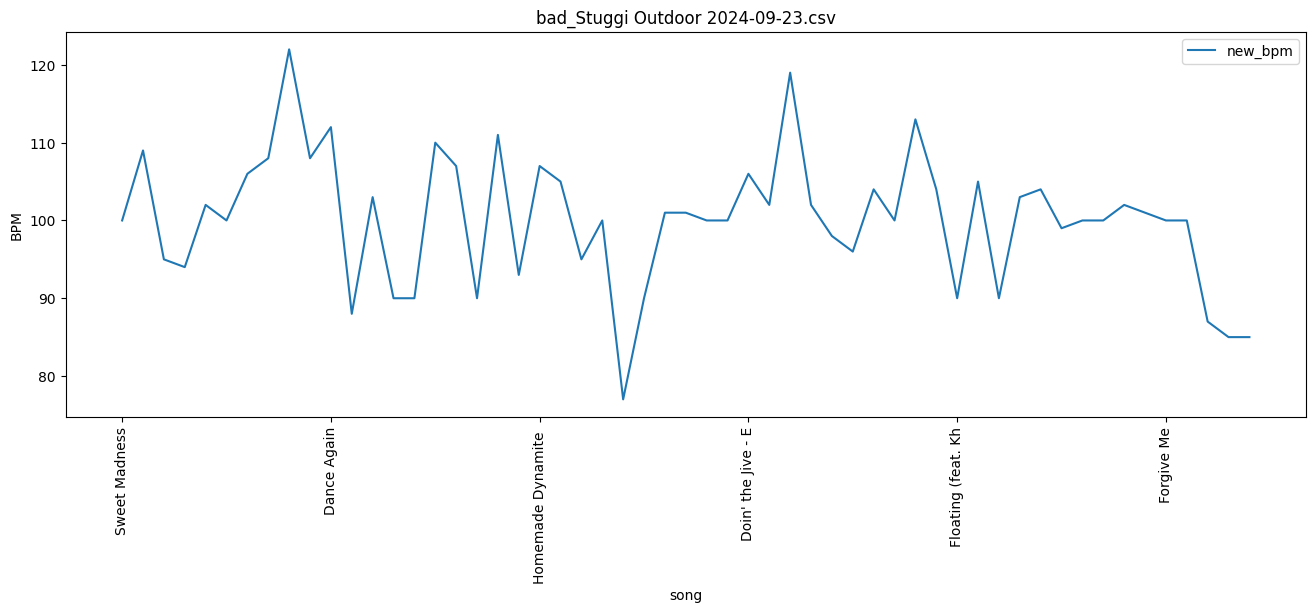

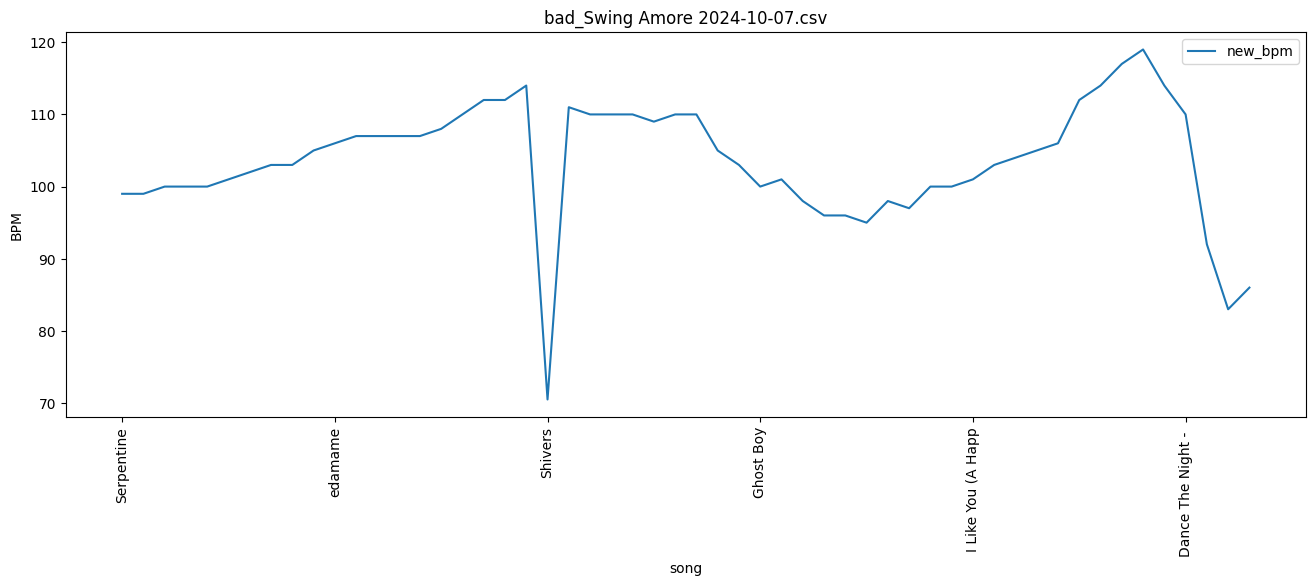

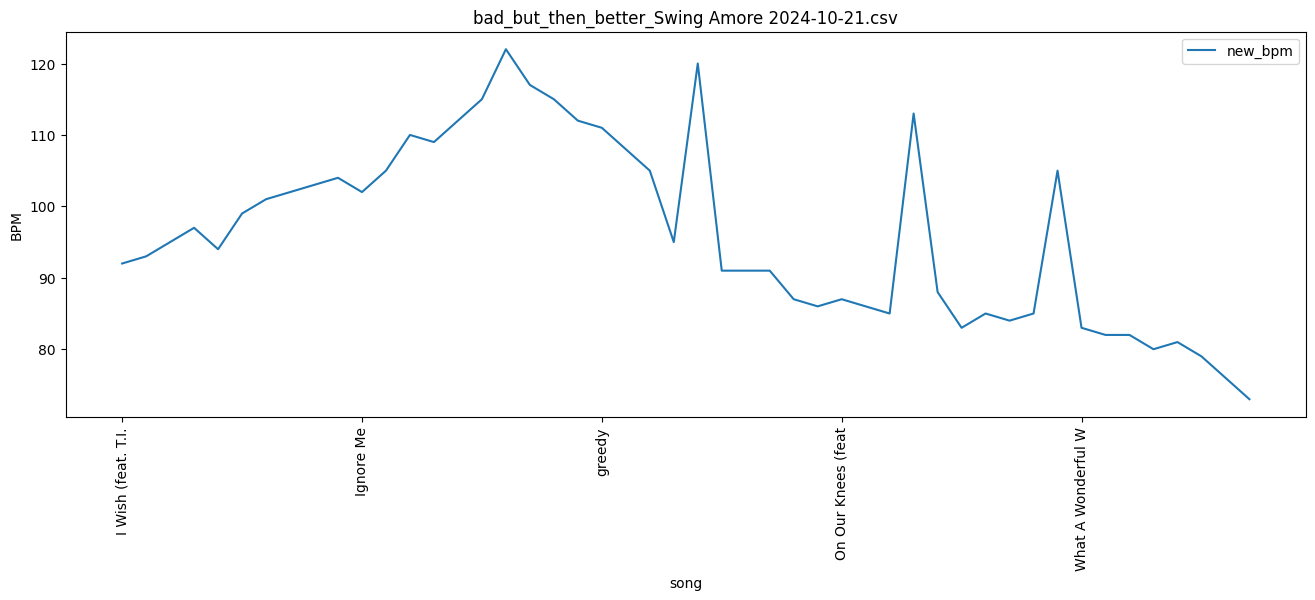

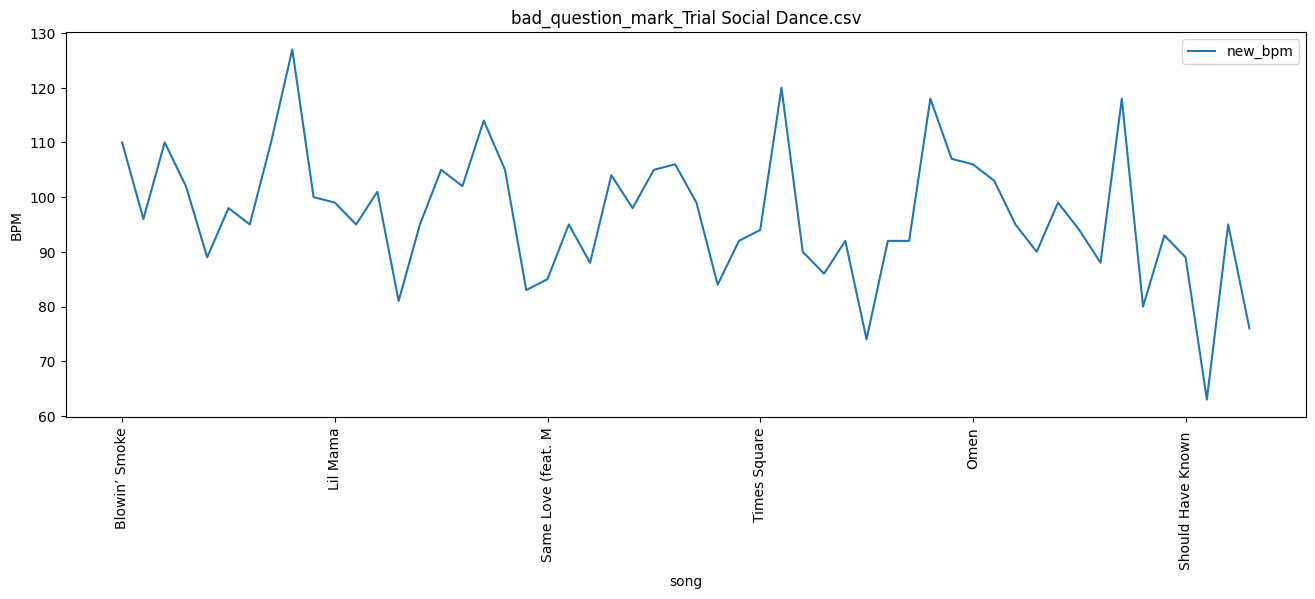

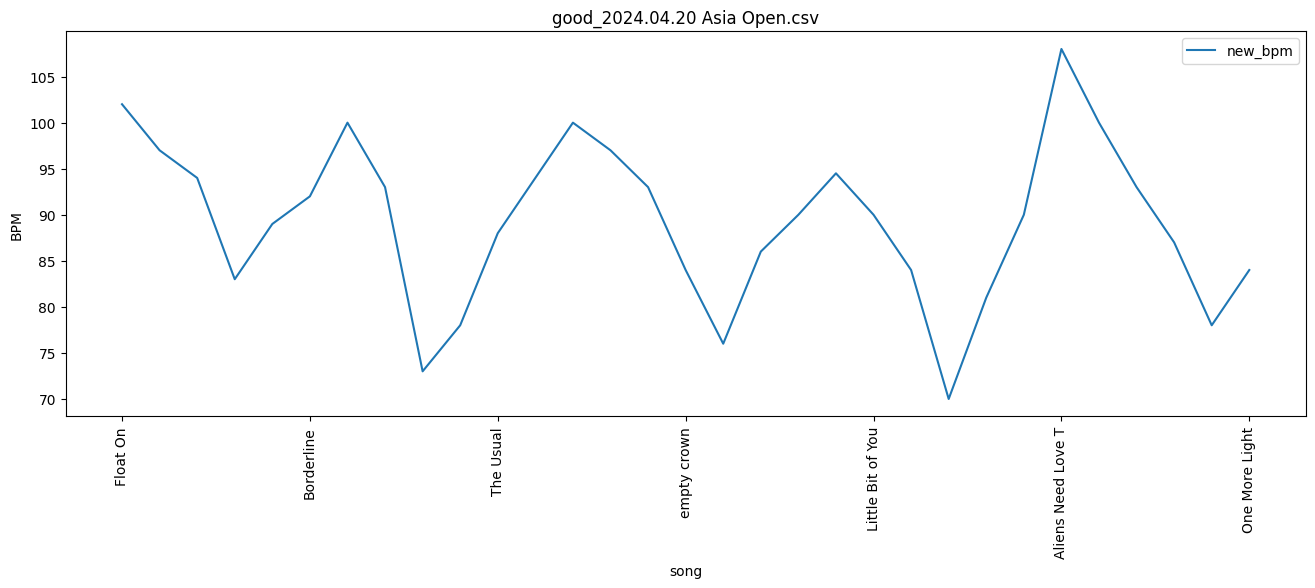

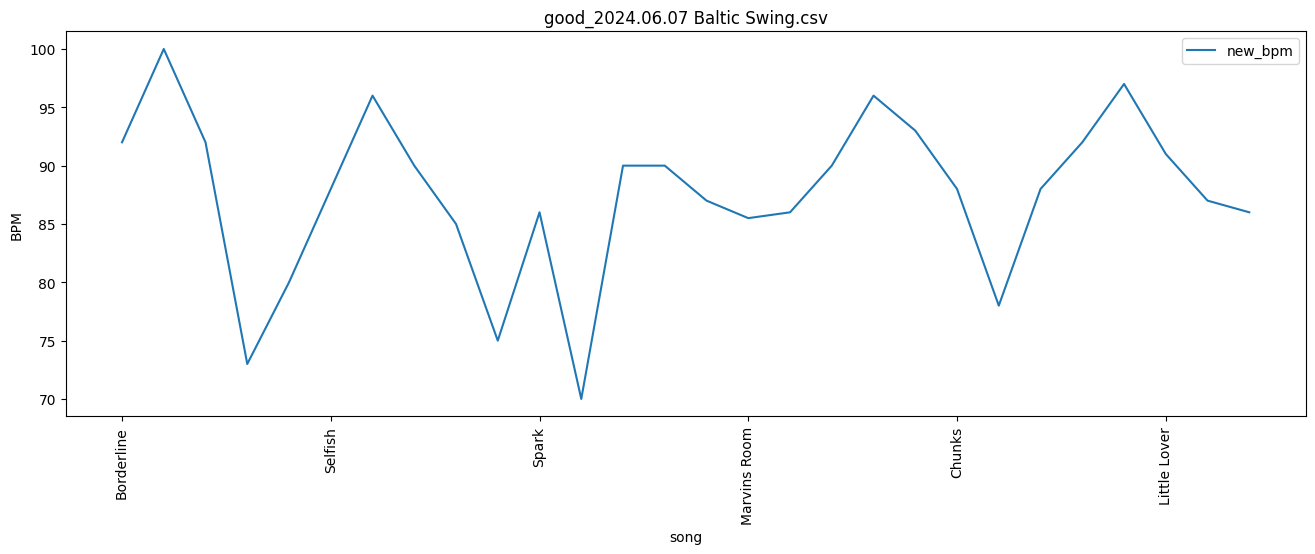

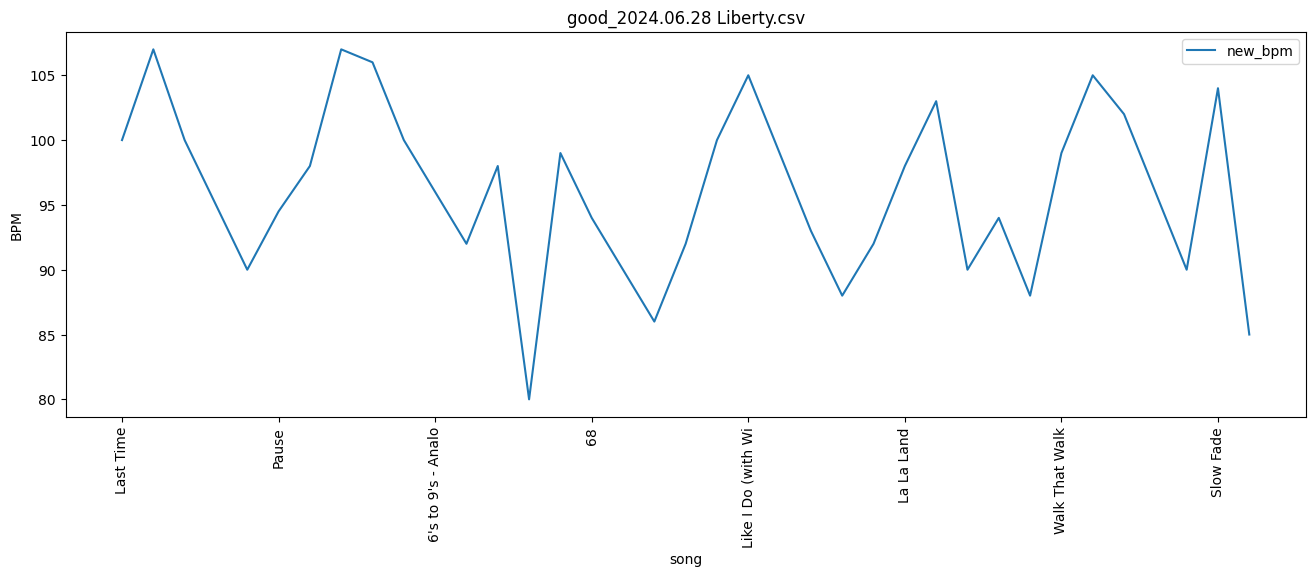

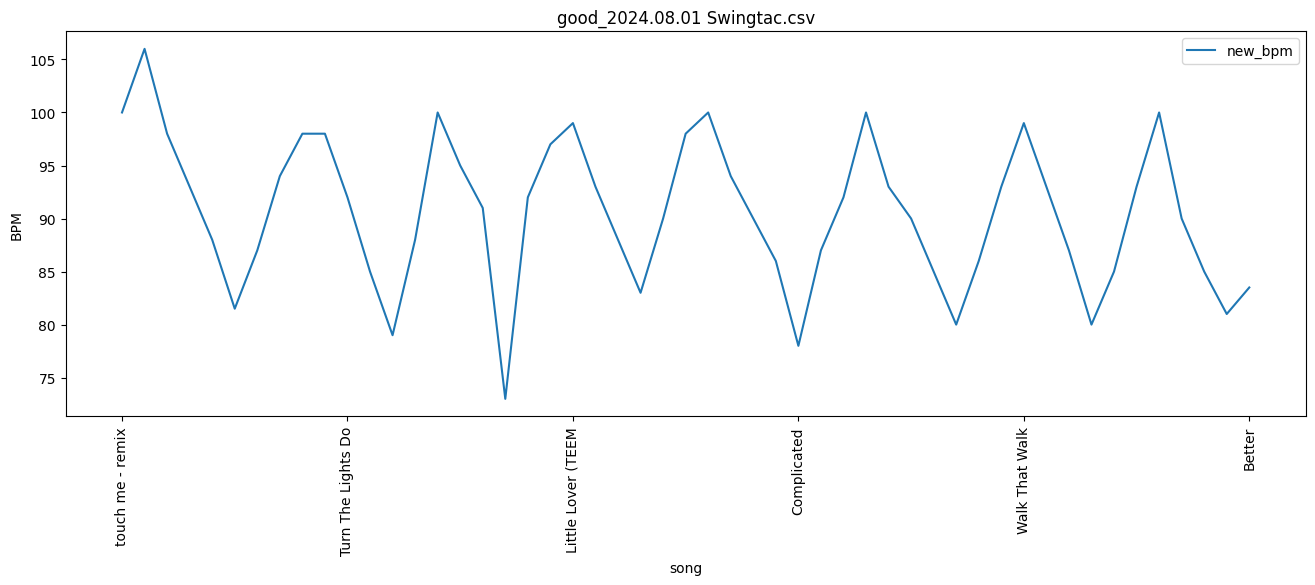

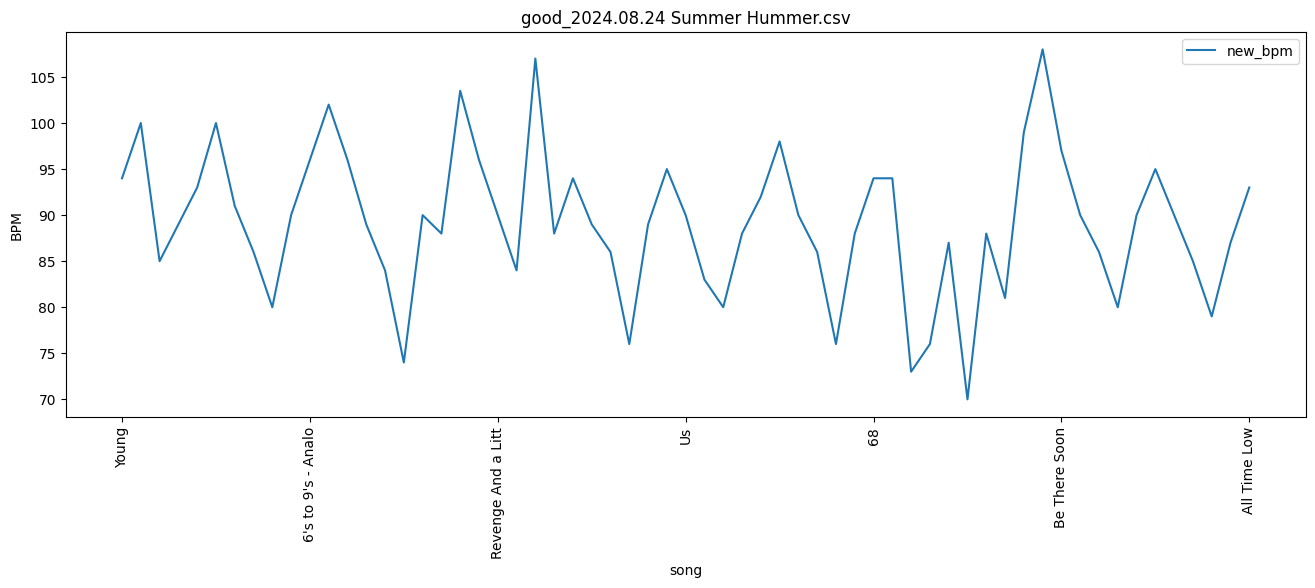

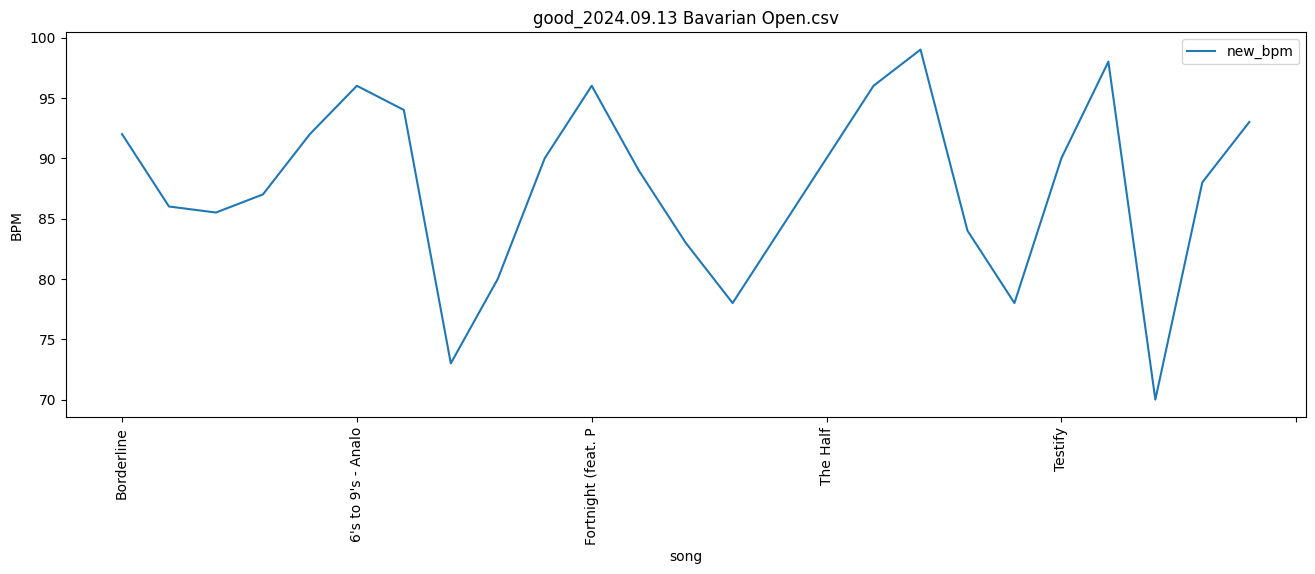

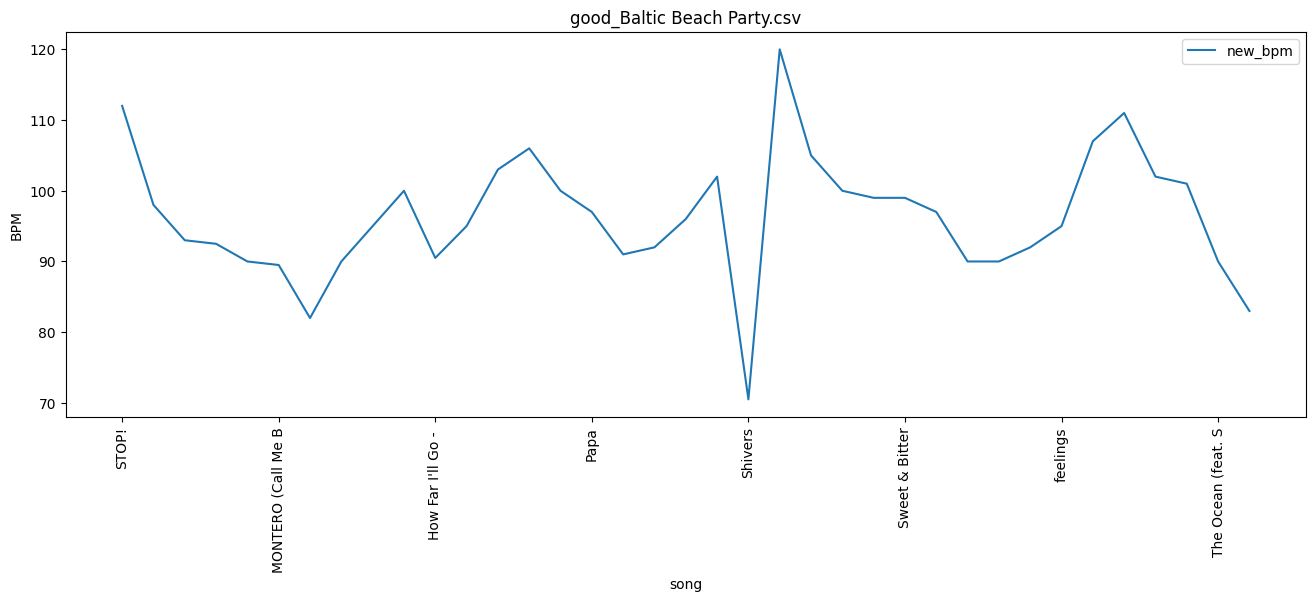

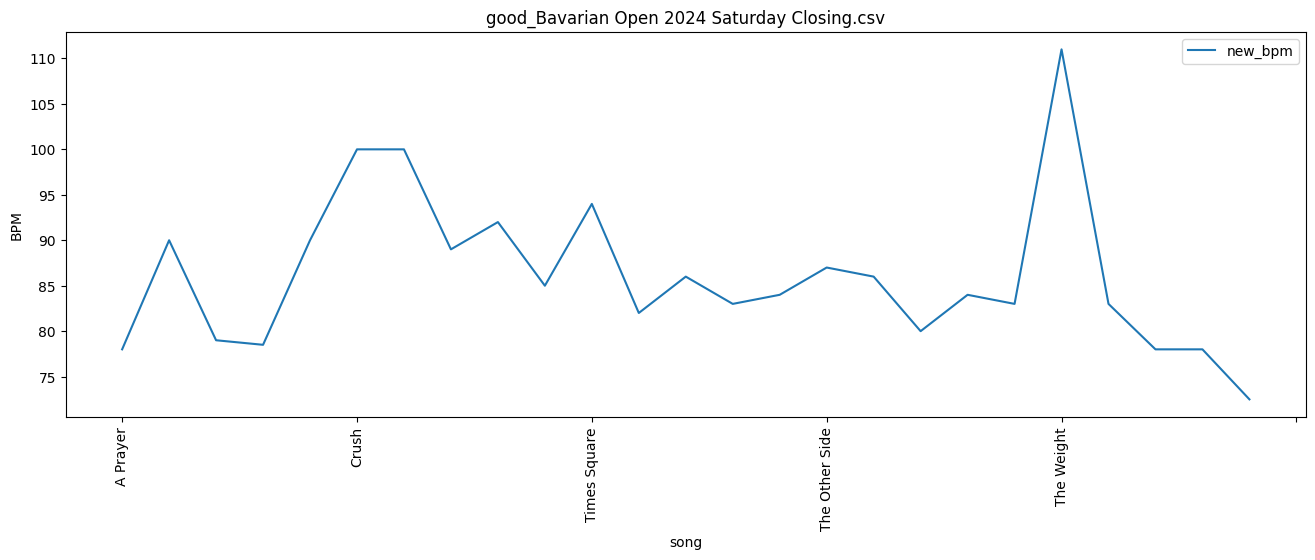

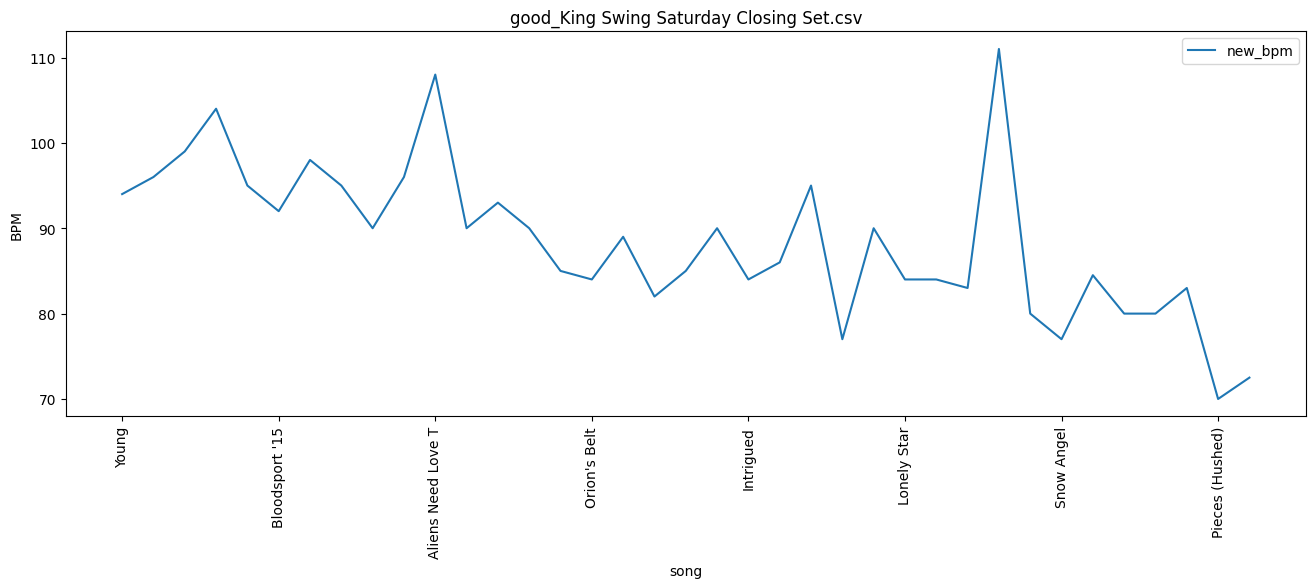

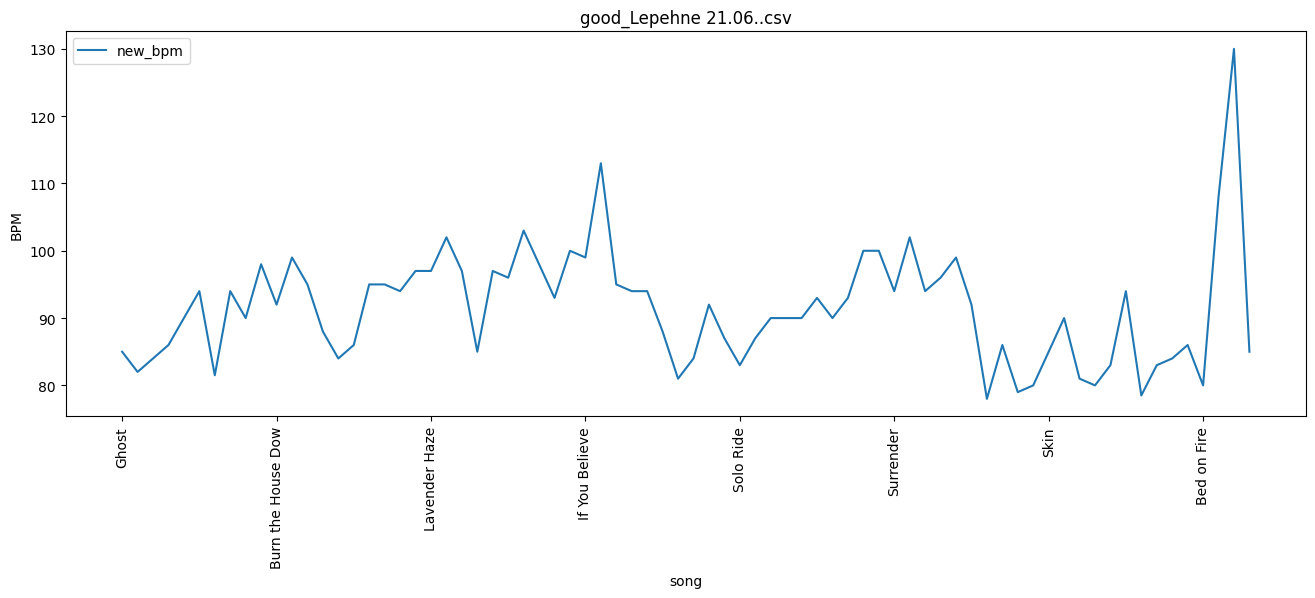

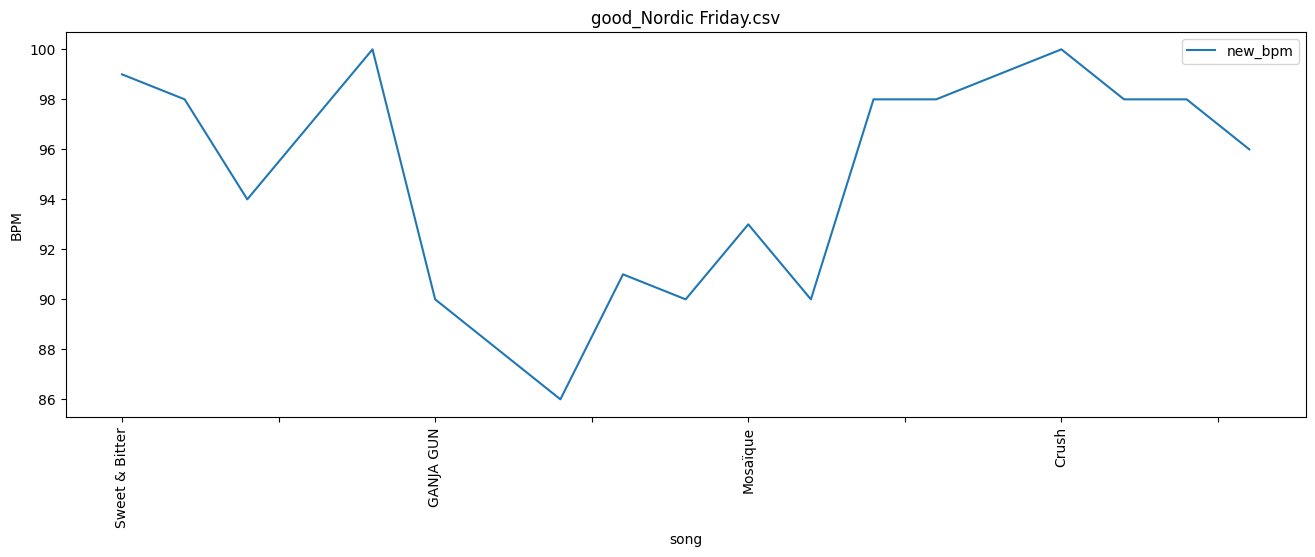

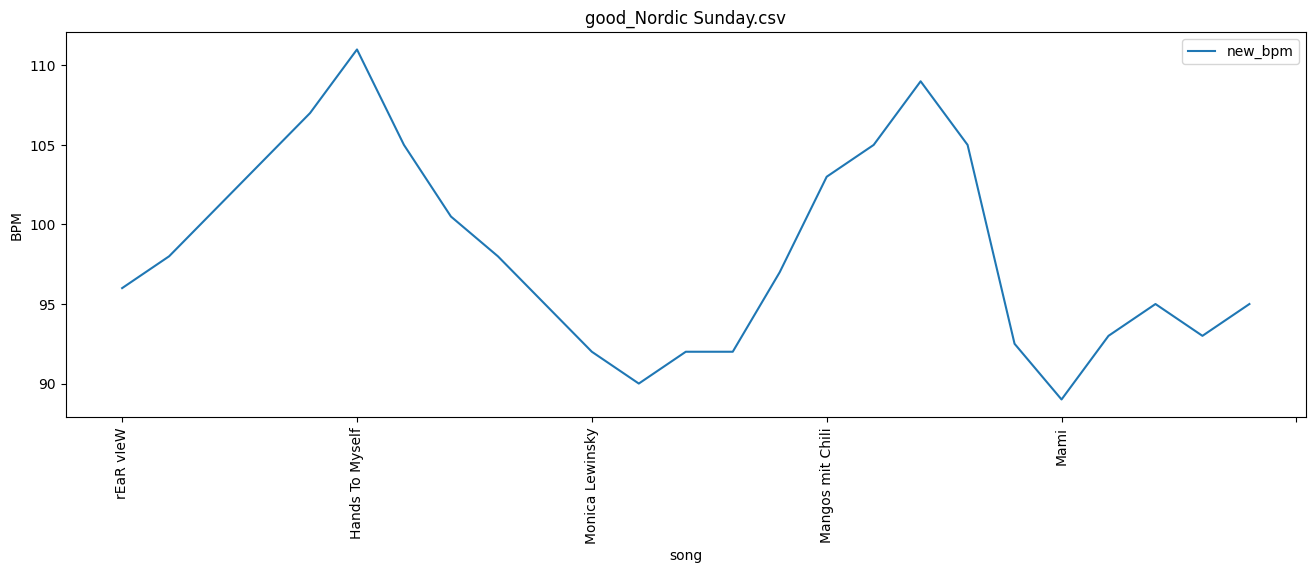

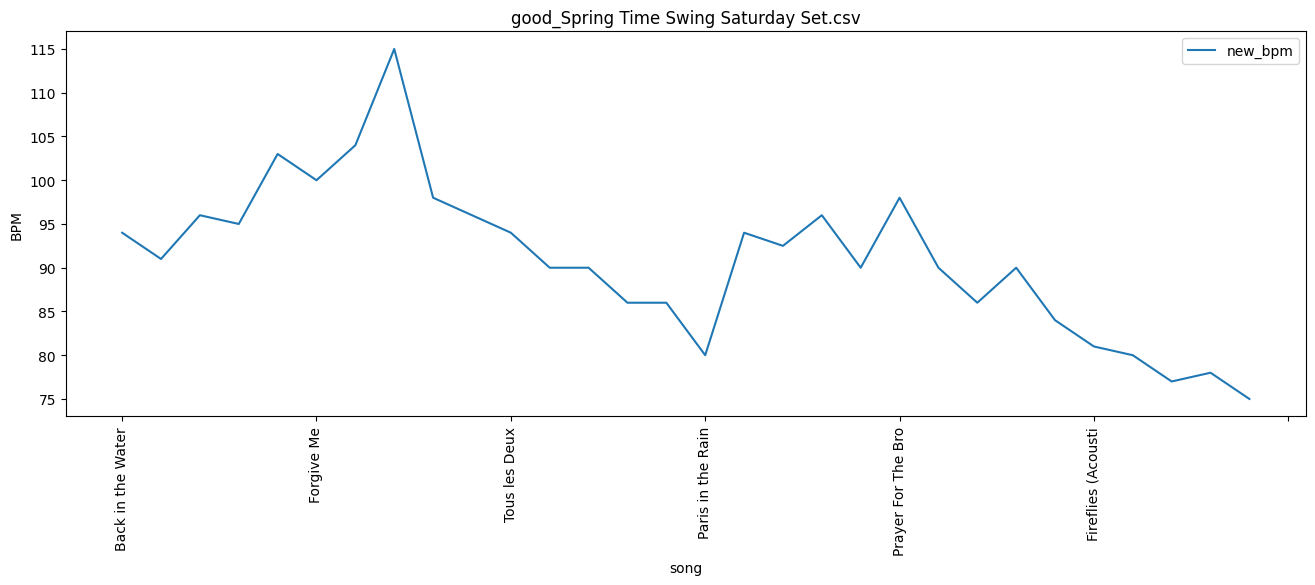

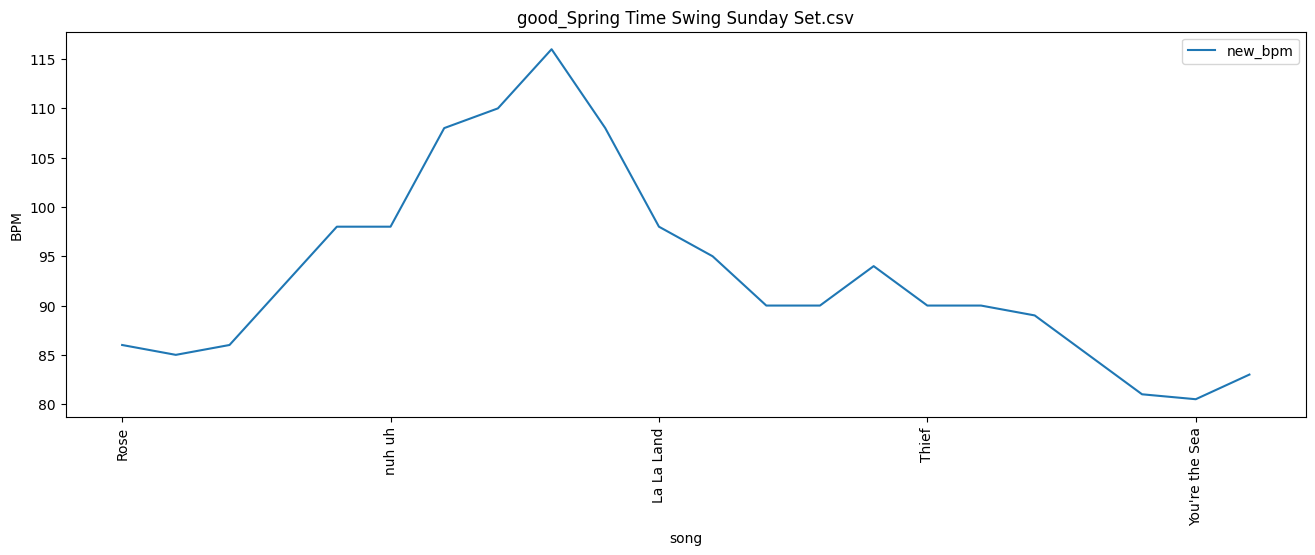

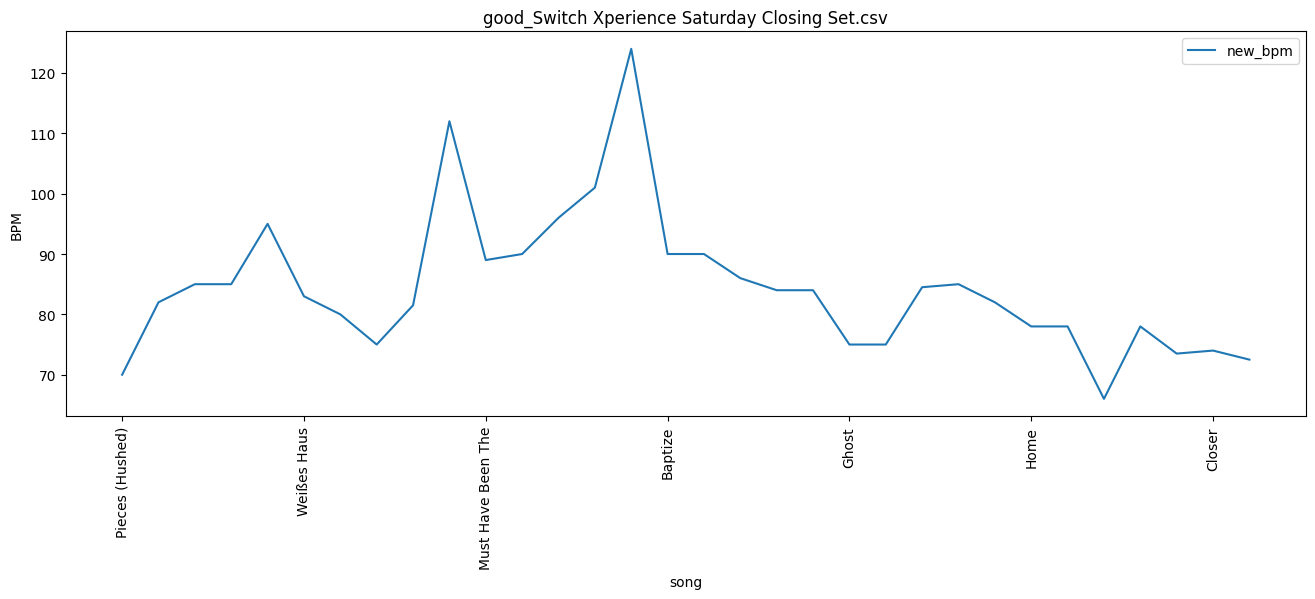

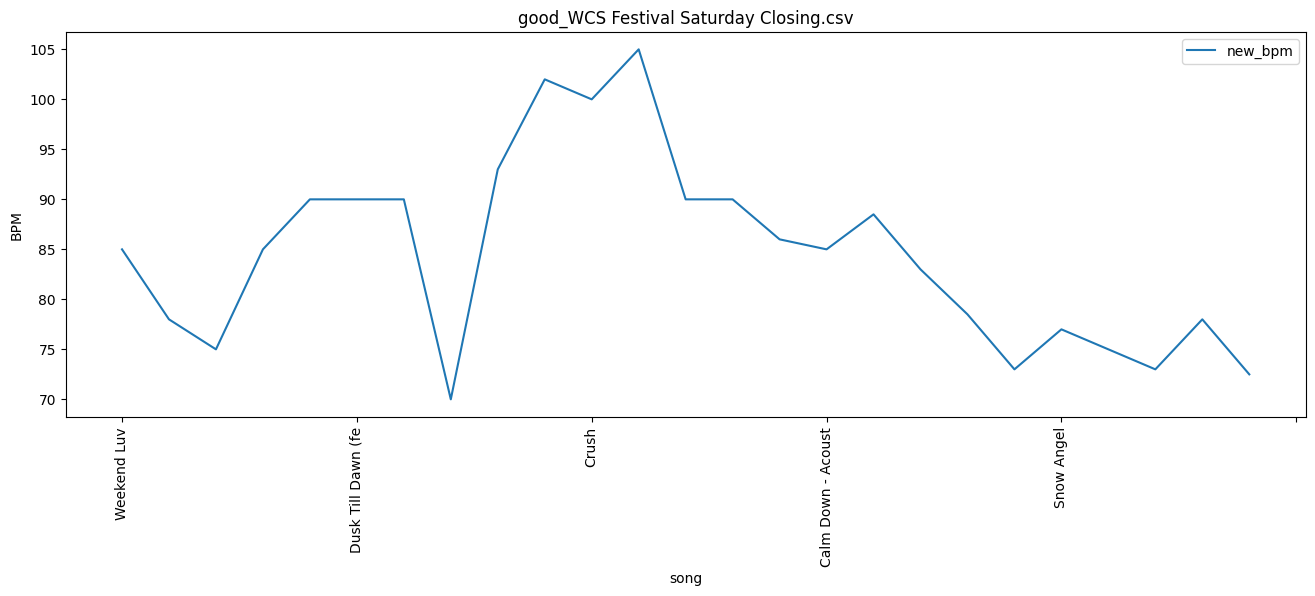

In [81]:
for i in sorted(os.listdir('Playlists/')):
    if 'unordered' not in i:
        (pl.read_csv(f'Playlists/{i}').pipe(adjust_bpm).to_pandas()
          
        #plot things
        ).plot(x='song', 
               y='new_bpm', 
               kind='line',
               title=i,
               figsize=(16, 5), 
               legend=True, 
               rot=90, 
               ylabel='BPM',
              )